In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 # Primeiro X e depois Y. Um eixo horizontal maior!!!

# Série Anual

Vamos criar uma série de dados pelo próprio NumPy, com Média aproximadamente zero, desvio padrão 1 e com 41 valores (1980 até 2020) (essas características descritivas são necessarias para seguirem uma normal)

In [171]:
# Série de 1980 a 2020 (41 Anos, conta-se também o 1980 e 2020)

np.random.seed(10) # Parâmetro para sempre dar o mesmo random 

dados1 = np.random.normal(0,1,41) # Com distribuição normal (Média aprox 0, DP 1, 41 valores)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [172]:
type(dados1)

numpy.ndarray

Como temos dados em uma array (um vetor), precisamos transformar em um tipo de "Series", ou seja, uma série.

In [173]:
serie = pd.Series(dados1)

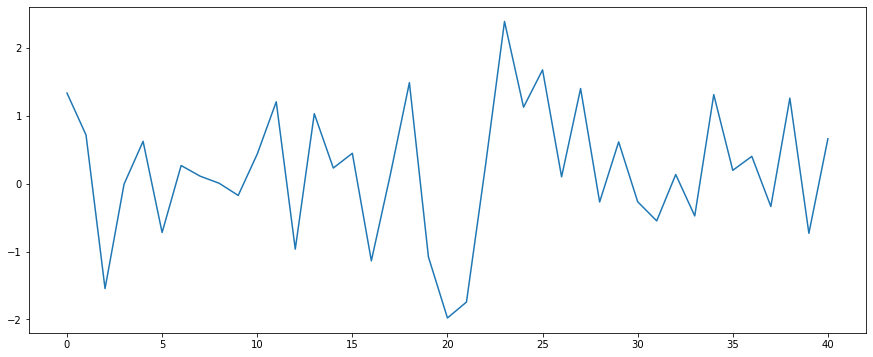

In [174]:
serie.plot()
plt.show()

In [175]:
dados1 = pd.DataFrame(dados1)
dados1

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336
5,-0.720086
6,0.265512
7,0.108549
8,0.004291
9,-0.174600


In [176]:
dados1.columns = ['Valores']
dados1.head()

,Valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [177]:
dados1.shape

(41, 1)

São 41 linhas e uma coluna (uma variável)

In [178]:
dados1.describe()

,Valores
count,41.000000
mean,0.183670
std,0.964847
min,-1.977728
25%,-0.337632
50%,0.195013
75%,0.715279
max,2.384967


Média aproximadamente zero e desvio padrão aproximadamente um. Temos uma média bem próxima do valor da mediana, ou seja, estamos tendendo a uma distribuição normal (uma distribuição simétrica).

Oque atualmente nos falta é o índice X dos anos

In [179]:
indice = pd.date_range('1980', periods = len(dados1), freq= 'Y')
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

A função `date_range` serve para criar um intervalo de dados com o tipo `data`. Será preenchido até o tamanho total dos dados, 1980-2020, sendo feita anualmente.

In [180]:
serie1 = pd.Series(dados1['Valores'].values, index = indice)

Criar uma `Series`, com os dados da **dados1**`valores`, utilizando os índices criados com a função `date_range`

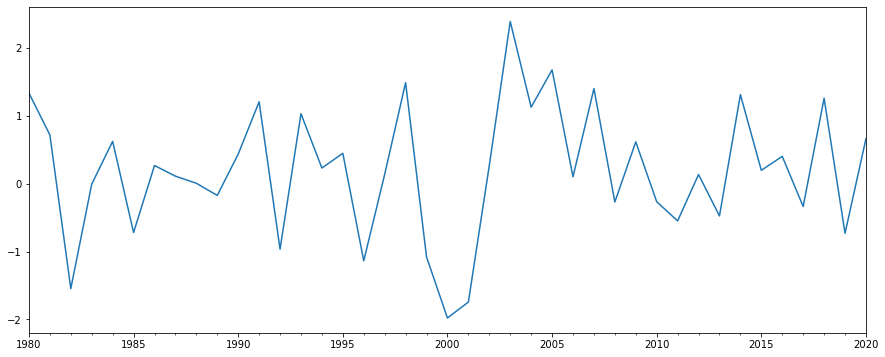

In [181]:
serie1.plot()
plt.show()

Agora é possível visualizar o gráfico, com os dados anuais no eixo X sem os valores dos dias e meses, somente com os anos.

## Verificação da normalidade

In [182]:
import scipy.stats as stats

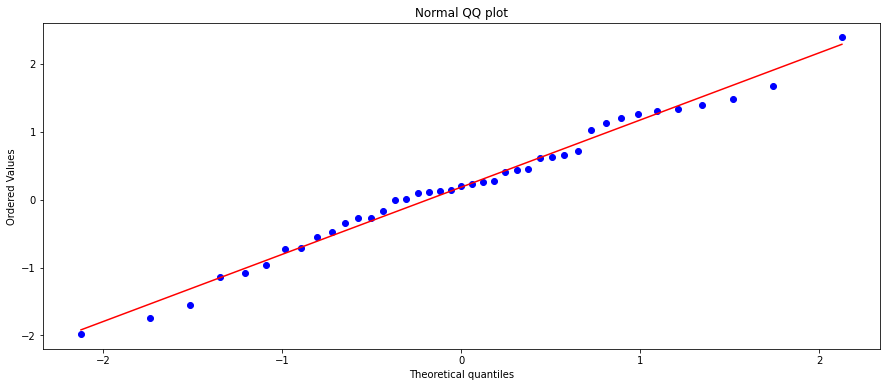

In [183]:
stats.probplot(serie1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Quantis teóricos por valores normalizados e ordenados. O grafico quantil-quantil ou qq-plot, porposto por Wilk & Gnanadesikan (1968), e um dispositivo grafico exploratorio utilizado para verificar a validade de um pressuposto de distribuicao para um conjunto de dados. Em geral, a ideia basica  ́e a de calcular o valor teoricamente esperado para cada ponto de dados com base na distribuicao em questao. Se os dados de fato seguirem a distribuicao assumida os pontos deste grafico formar ̃ao aproximadamente uma linha reta.

### Teste numérico I Teste Shapiro-Wilk

Ho: P > 0,05 (Distribuição normal)
H1: P < 0,05 (Distribuição não normal)
Com um nível de significância de 0,05 ou 5%

In [184]:
e, p = stats.shapiro(serie1)
e, p

(0.9869343638420105, 0.9118920564651489)

Temos um P-Valor maior que o nível de significância, ou seja, não rejeitamos a hipótese nula de que a distribuição segue uma normal.

https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk

# Série Mensal

In [185]:
np.random.seed(6)
dados2 = np.random.normal(0,1,72) # Média 0, DP 1, 72 valores
dados2 # Será do tipo array, ou seja, um vetor.

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

In [186]:
dados2 = pd.DataFrame(dados2)
dados2.columns = ['valores']

In [187]:
dados2.describe()

,valores
count,72.000000
mean,0.092709
std,1.022496
min,-2.486781
25%,-0.567756
50%,0.151507
75%,0.814155
max,2.631281


In [188]:
dados2.shape

(72, 1)

Vamos criar agora o periodo dos índices mensalmente.

In [189]:
import datetime

In [190]:
data = np.array('2015-01', dtype = np.datetime64()) # Criar um vetor, que comece em 2015 no mês 1, e que tenha o tipo datetime64()
data # Perceba o colchete de mês.

array('2015-01', dtype='datetime64[M]')

In [191]:
data = data + np.arange(72) # Sobescrever os vetores, somar mais 72 valores
data

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype='datetime64[M]')

In [192]:
serie2 = pd.Series(dados2['valores'].values, index = data) # Pode ser feito de diversas maneiras diferentes, mas, para mim,
# essa parece ser a maneira mais eficiente.

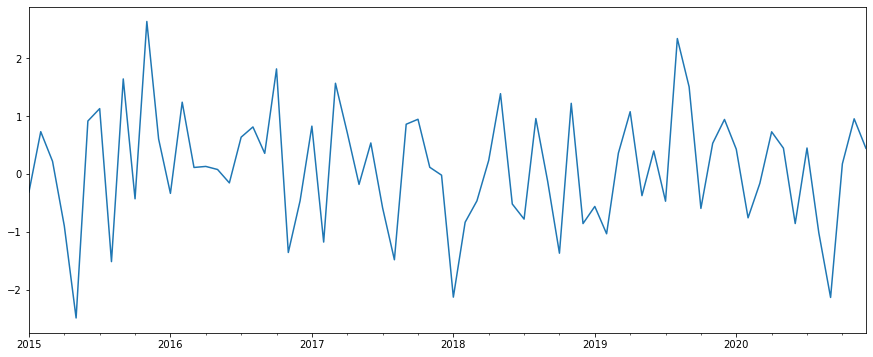

In [193]:
serie2.plot()
plt.show()

In [194]:
type(serie2)

pandas.core.series.Series

## Verificação de normalidade

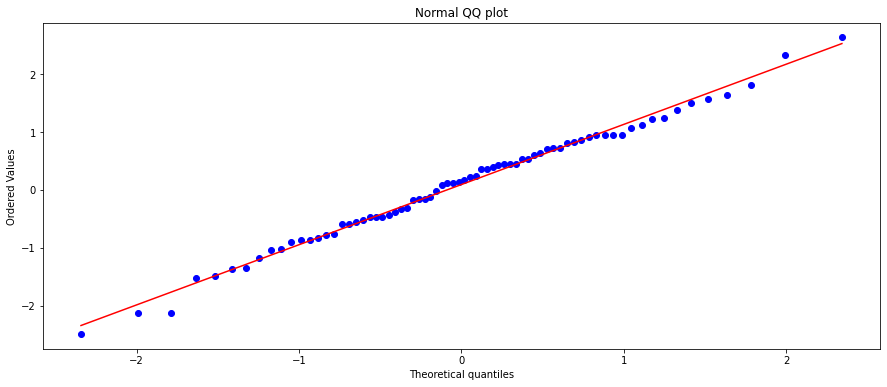

In [195]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

### Teste Shapiro-Wilk

In [196]:
e, p = stats.shapiro(serie2)
e, p

(0.9929385185241699, 0.9612157940864563)

Aceita-se a hipótese nula, ou seja, de que ela seja uma normal.

# Série diária

In [197]:
np.random.seed(12)
dados3 = np.random.normal(0,1,731) # Média normal, DP 1 e com 731 valores
dados3

array([ 4.72985831e-01, -6.81425879e-01,  2.42439497e-01, -1.70073563e+00,
        7.53142834e-01, -1.53472134e+00,  5.12707813e-03, -1.20227670e-01,
       -8.06981879e-01,  2.87181939e+00, -5.97822919e-01,  4.72456994e-01,
        1.09595612e+00, -1.21516880e+00,  1.34235637e+00, -1.22149788e-01,
        1.01251548e+00, -9.13869147e-01, -1.02953021e+00,  1.20979645e+00,
        5.01872304e-01,  1.38846177e-01,  6.40761113e-01,  5.27332665e-01,
       -1.15436024e+00, -2.21333348e+00, -1.68175651e+00, -1.78809425e+00,
       -2.21853495e+00, -6.47430780e-01, -5.28404321e-01, -3.92091748e-02,
        2.14975948e-01, -3.84358803e-01, -2.53904078e-01,  7.32520746e-02,
       -9.97203837e-01, -7.13856288e-01,  3.54163461e-02, -6.77945365e-01,
       -5.71881062e-01, -1.05862315e-01,  1.33583134e+00,  3.18665288e-01,
       -3.37595250e-01, -5.85268278e-01, -1.14919941e-01,  2.24181779e+00,
       -3.14741652e+00,  5.35135893e-01,  2.32490439e-01,  8.67611951e-01,
       -1.14821271e+00,  

In [198]:
type(dados3) # Tipo vetor

numpy.ndarray

In [199]:
dados3 = pd.DataFrame(dados3)
dados3.columns = ['variaveis']
dados3

,variaveis
0,0.472986
1,-0.681426
2,0.242439
3,-1.700736
4,0.753143
...,...
726,1.481370
727,-1.298265
728,-1.601914
729,0.739766


In [200]:
dados3.describe()

,variaveis
count,731.000000
mean,-0.033516
std,1.010658
min,-3.710679
25%,-0.733966
50%,0.023273
75%,0.666789
max,3.166557


In [201]:
dados3.shape

(731, 1)

In [202]:
indice3 = pd.date_range('2019 Jan 1', periods = len(dados3), freq = 'D') # Como temos um range diário, será feito pelo dia,
# com um comprimento de 731, pois temos 731 dados.
indice3

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [203]:
serie3 = pd.Series(dados3['variaveis'].values, index = indice3)

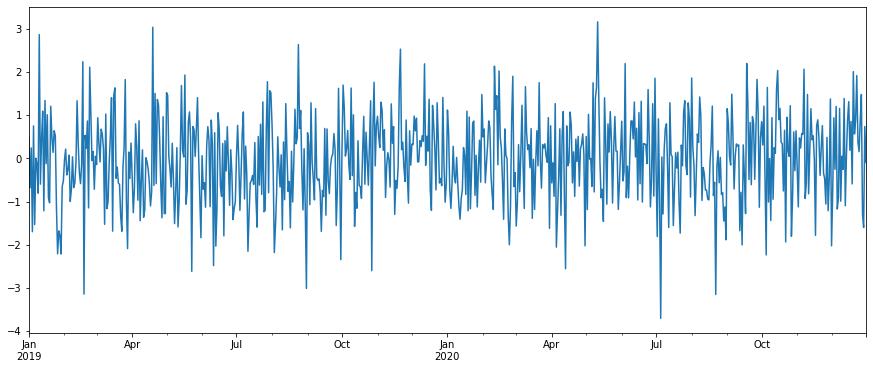

In [204]:
serie3.plot()
plt.show()

In [205]:
type(serie3)

pandas.core.series.Series

## Verificação de Normalidade

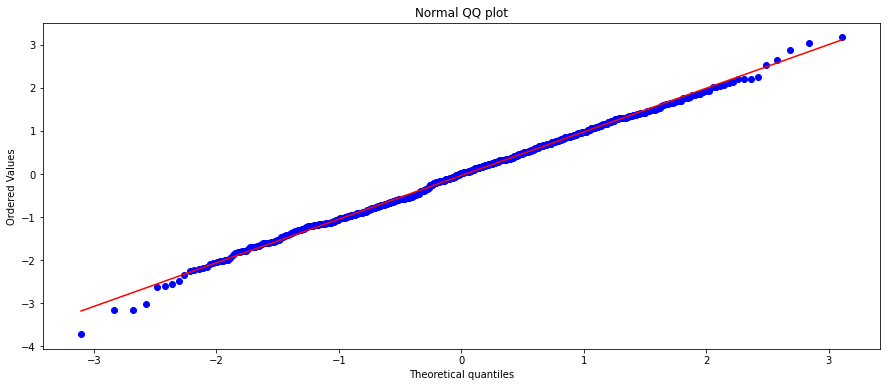

In [206]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

### Teste Shapiro-Wilk

In [207]:
e, p = stats.shapiro(serie3)
e, p

(0.997778058052063, 0.44898200035095215)

# Série Trimestral

In [208]:
np.random.seed(20)
dados4 = np.random.normal(0,1,164)
dados4

array([ 8.83893113e-01,  1.95865022e-01,  3.57536516e-01, -2.34326191e+00,
       -1.08483259e+00,  5.59696289e-01,  9.39469350e-01, -9.78481042e-01,
        5.03096840e-01,  4.06414469e-01,  3.23461010e-01, -4.93410882e-01,
       -7.92016791e-01, -8.42367934e-01, -1.27950266e+00,  2.45715170e-01,
       -4.41948007e-02,  1.56763255e+00,  1.05110868e+00,  4.06368426e-01,
       -1.68646101e-01, -3.18970279e+00,  1.12013226e+00,  1.33277821e+00,
       -2.43338766e-01, -1.30030711e-01, -1.09017371e-01,  1.55618644e+00,
        1.28778353e-01, -2.06694872e+00, -8.85493155e-01, -1.10457948e+00,
        9.32866347e-01,  2.05983800e+00, -9.34937958e-01, -1.61299022e+00,
        5.27069718e-01, -1.55110074e+00,  3.29613339e-01, -1.13652654e+00,
       -3.38490605e-01,  3.20970784e-01, -6.02308018e-01,  1.54472836e+00,
        6.47034084e-01,  5.93217213e-01,  4.38024497e-01,  1.35778902e+00,
        1.20451128e+00,  1.35179619e+00,  4.93437236e-01, -2.70436525e+00,
       -5.55185797e-01,  

In [209]:
dados4 = pd.DataFrame(dados4)
dados4.columns = ['valores']

In [210]:
dados4.describe()

,valores
count,164.000000
mean,0.019060
std,1.051344
min,-3.189703
25%,-0.801186
50%,0.148101
75%,0.761434
max,2.094665


In [211]:
indice4 = pd.date_range('1980-01', periods = len(dados4), freq = '3M')
indice4

DatetimeIndex(['1980-01-31', '1980-04-30', '1980-07-31', '1980-10-31',
               '1981-01-31', '1981-04-30', '1981-07-31', '1981-10-31',
               '1982-01-31', '1982-04-30',
               ...
               '2018-07-31', '2018-10-31', '2019-01-31', '2019-04-30',
               '2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30',
               '2020-07-31', '2020-10-31'],
              dtype='datetime64[ns]', length=164, freq='3M')

In [212]:
serie4 = pd.Series(dados4['valores'].values, index = indice4)

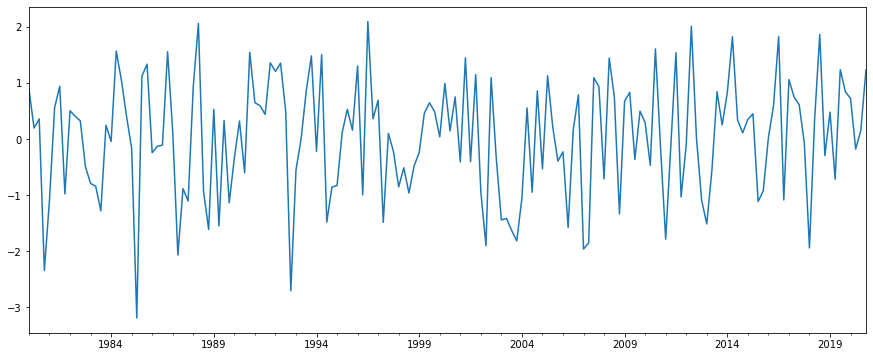

In [213]:
serie4.plot()
plt.show()

## Verificação da normalidade

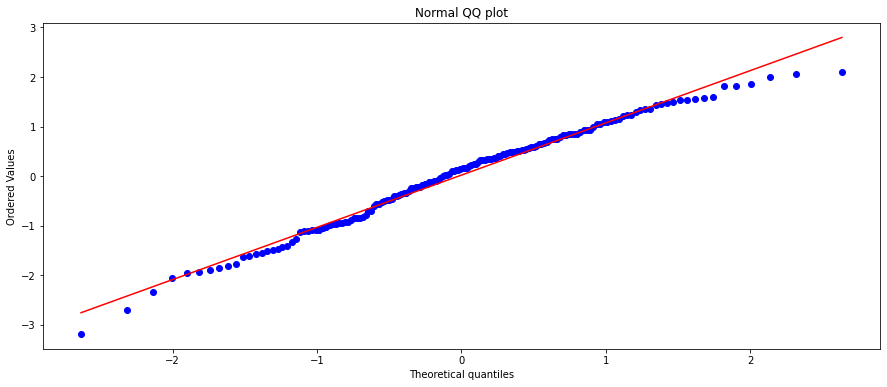

In [214]:
stats.probplot(serie4, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

### Teste Shapiro-Wilk

In [215]:
e, p = stats.shapiro(serie4)
e, p

(0.9852806925773621, 0.08074235171079636)

Teste com P-Valor maior que o nível de significância de 0.05, ou seja, a distribuição dos dados segue uma normal.

***

# Teste de Estacionaridade

## Criação da Série

In [216]:
np.random.seed(10)
dados_est = np.random.normal(0,1,41) # 41 valores, média 0 e dp 1
dados_est

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [217]:
dados_est = pd.DataFrame(dados_est)
dados_est.columns = ['valores']
dados_est.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [218]:
indice = pd.date_range('1980', periods = len(dados_est), freq = 'Y')

In [219]:
serie = pd.Series(dados_est['valores'].values, index = indice)

In [220]:
serie

1980-12-31    1.331587
1981-12-31    0.715279
1982-12-31   -1.545400
1983-12-31   -0.008384
1984-12-31    0.621336
1985-12-31   -0.720086
1986-12-31    0.265512
1987-12-31    0.108549
1988-12-31    0.004291
1989-12-31   -0.174600
1990-12-31    0.433026
1991-12-31    1.203037
1992-12-31   -0.965066
1993-12-31    1.028274
1994-12-31    0.228630
1995-12-31    0.445138
1996-12-31   -1.136602
1997-12-31    0.135137
1998-12-31    1.484537
1999-12-31   -1.079805
2000-12-31   -1.977728
2001-12-31   -1.743372
2002-12-31    0.266070
2003-12-31    2.384967
2004-12-31    1.123691
2005-12-31    1.672622
2006-12-31    0.099149
2007-12-31    1.397996
2008-12-31   -0.271248
2009-12-31    0.613204
2010-12-31   -0.267317
2011-12-31   -0.549309
2012-12-31    0.132708
2013-12-31   -0.476142
2014-12-31    1.308473
2015-12-31    0.195013
2016-12-31    0.400210
2017-12-31   -0.337632
2018-12-31    1.256472
2019-12-31   -0.731970
2020-12-31    0.660232
Freq: A-DEC, dtype: float64

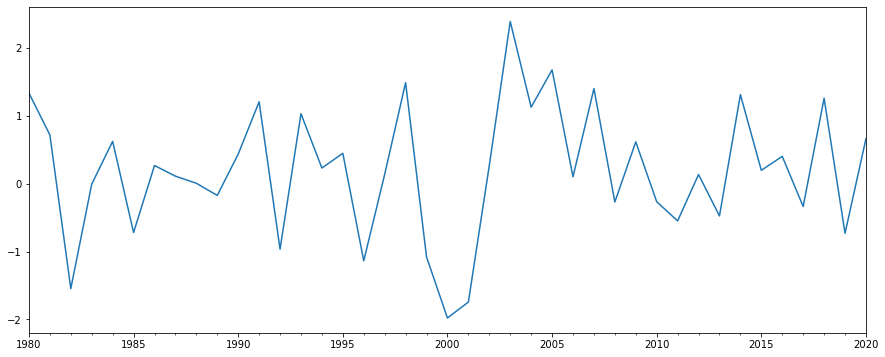

In [221]:
serie.plot()
plt.show()

## Teste de Estacionaridade

Um teste muito importante, série estacionária possui uma precisão maior e, se mesmo não tivermos uma série estacionária, podemos transformar.

Média e variância constante.

In [222]:
import statsmodels.tsa.stattools

### Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico <br>
Ha = é estacionário: estatística do teste < valor crítico

In [223]:
statsmodels.tsa.stattools.kpss(serie)

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0685962789581985,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Com a estatística do teste de 0.06859, temos que é menor que o valor crítico, ou seja, é estacionária.

In [224]:
print(kpss[0]) # Estatística do teste
print(kpss[1]) # P-Valor

0.0685962789581985
0.1


### Teste df (Dickey Fuller)

Ho = não é estacionário: estatística do teste > valor crítico <br>
Ha = é estacionário: estatística do teste < valor crítico

In [227]:
fuller = statsmodels.tsa.stattools.adfuller(serie)
print(f'Estatística do teste: {fuller[0]}')
print(f'P_Valor: {fuller[1]}')

Estatística do teste: -5.864177001394797
P_Valor: 3.3556717885207143e-07


In [228]:
statsmodels.tsa.stattools.adfuller(serie)

(-5.864177001394797,
 3.3556717885207143e-07,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 90.17324024534712)